# PA2 of CSE 251B, WI 21

## (a) Load training and testing data then create a validation split from the training data.

In [1]:
from neuralnet import *
from random import shuffle
import numpy as np

# Load the configuration.
config = load_config("./")

# Create the model
model  = Neuralnetwork(config)

 # Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test, y_test = load_data(path="./", mode="t10k")

x_train = normalize_data(x_train)
# Y_train = one_hot_encoding(labels=Y_train)
x_test = normalize_data(x_test)
# y_test = one_hot_encoding(labels=y_test)

# Create splits for validation data here.
x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.1)

## (c) training and validation accuracy / loss vs number of training epochs

In [ ]:
# load model para
config_c = yaml.load(open('./partc.yaml', 'r'), Loader=yaml.SafeLoader)

# Train the model with cross validation
max_test_accu = 0

model_c = Neuralnetwork(config_c)
recording = train(model_c, x_train, y_train, x_valid, y_valid, config_c)

# Recall parameters with minimum validation loss
model_c.load_para()
test_accuracy = test(model_c, x_test, y_test)
max_test_accu = max(max_test_accu, test_accuracy)
        
print('max test accuracy: {:.4f}'.format(max_test_accu))

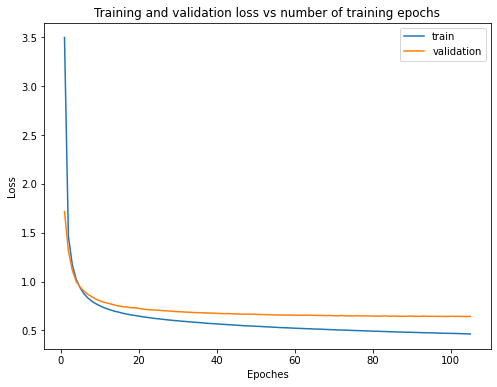

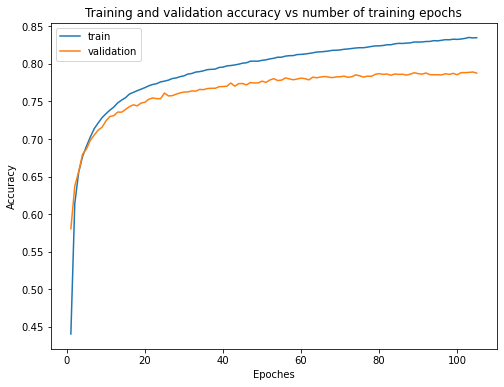

In [3]:
plt.rcParams["figure.figsize"] = (8, 6)

# Plots
plt.figure(1)
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Training and validation loss vs number of training epochs')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs number of training epochs')
plt.legend()
plt.show()

## (d) Experiment with Regularization

In [2]:
# load model para
config_d = yaml.load(open('./partd.yaml', 'r'), Loader=yaml.SafeLoader)

recordings = []

for l2_penalty in [1e-2, 1e-3, 1e-4]:
    config_d['L2_penalty'] = l2_penalty

    # Train the model with cross validation
    max_test_accu = 0

    model_d = Neuralnetwork(config_d)
    recording = train(model_d, x_train, y_train, x_valid, y_valid, config_d)
    recordings.append(recording)

    # Recall parameters with minimum validation loss
    model_d.load_para()
    test_accuracy = test(model_d, x_test, y_test)
    max_test_accu = max(max_test_accu, test_accuracy)
            
    print(f'l2_penalty: {l2_penalty}, max test accuracy: {max_test_accu:.4f}')

Epoch 1, Time 1.5300822257995605 seconds
Train_loss = 182.4539, Valid_loss = 144.6652, Valid_accuracy = 0.2590
Epoch 11, Time 16.817611694335938 seconds
Train_loss = 3.5018, Valid_loss = 2.9977, Valid_accuracy = 0.7582
Epoch 21, Time 31.808597087860107 seconds
Train_loss = 1.0117, Valid_loss = 0.9897, Valid_accuracy = 0.7633
l2_penalty: 0.01, max test accuracy: 0.7573
Epoch 1, Time 1.5720012187957764 seconds
Train_loss = 29.0790, Valid_loss = 25.8032, Valid_accuracy = 0.2333
Epoch 11, Time 16.825955390930176 seconds
Train_loss = 14.8886, Valid_loss = 14.6103, Valid_accuracy = 0.6133
Epoch 21, Time 32.10977339744568 seconds
Train_loss = 9.8069, Valid_loss = 9.6377, Valid_accuracy = 0.6780
Epoch 31, Time 47.43628120422363 seconds
Train_loss = 6.5999, Valid_loss = 6.4996, Valid_accuracy = 0.7168
Epoch 41, Time 62.50486707687378 seconds
Train_loss = 4.5192, Valid_loss = 4.4569, Valid_accuracy = 0.7487
Epoch 51, Time 77.74566888809204 seconds
Train_loss = 3.1553, Valid_loss = 3.1134, Valid_

## (e) Experiment with Activations.

In [ ]:
# load model para
config_e = yaml.load(open('./parte.yaml', 'r'), Loader=yaml.SafeLoader)

recordings_e = []

for activation in ['sigmoid', 'tanh', 'ReLU', 'leakyReLU']:
    config_e['activation'] = activation

    # Train the model with cross validation
    max_test_accu = 0

    model_e = Neuralnetwork(config_e)
    recording = train(model_e, x_train, y_train, x_valid, y_valid, config_e)
    recordings_e.append(recording)

    # Recall parameters with minimum validation loss
    model_e.load_para()
    test_accuracy = test(model_e, x_test, y_test)
    max_test_accu = max(max_test_accu, test_accuracy)
            
    print(f'activation: {activation}, max test accuracy: {max_test_accu:.4f}')